<a href="https://colab.research.google.com/github/sirsteele97/AI-Projects/blob/master/Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import random
from random import seed
from random import random

seed(1)

value = random()

def calculate(p):
  import numpy as np
  mean = [0, 0]
  mean2 = [3, 0]
  cov = []
      
  if(value>.5):
    cov = [[1, 0], [0, 1]]
    x, y = np.random.multivariate_normal(mean, cov, 3000).T
  else:
    cov = [[p, 0], [0, p]]
    x, y = np.random.multivariate_normal(mean2, cov, 3000).T
  
  from sklearn.model_selection import train_test_split

  # create design matrix X and target vector y
  a = np.array(x)
  a = a[:,None]
  b = np.array(y)
  b = b[:,None]
  X = np.concatenate([a, b], axis=1)
  c = np.arange(0, 3000)
  Y = c

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
  

  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import accuracy_score

  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(X_train, y_train[:,])
  prediction = knn.predict(X_test)

  final_X = []
  final_Y = []
  for i in prediction:
    final_X.append(X[i][0])
    final_Y.append(X[i][1])

  test_X = []
  test_Y = []
  for i in y_test:
    test_X.append(X[i][0])
    test_Y.append(X[i][1])

  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(X_train, y_train[:,])
  prediction = knn.predict(X_test)

  Sum = 0
  for i in range(0, len(test_Y)):
    Sum = Sum + (test_Y[i] - final_Y[i])

  error1 = (1/len(test_X)*Sum)

  final_X = []
  final_Y = []
  for i in prediction:
    final_X.append(X[i][0])
    final_Y.append(X[i][1])

  test_X = []
  test_Y = []
  for i in y_test:
    test_X.append(X[i][0])
    test_Y.append(X[i][1])

  Sum = 0

  for i in range(0, len(test_Y)):
    Sum = Sum + (test_Y[i] - final_Y[i])

  error2 = (1/len(test_X)*Sum)

  return error1, error2

<function matplotlib.pyplot.show>

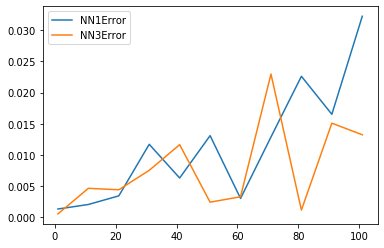

In [99]:


p = 1
NN1Error = []
NN3Error = []
yaxis = []
while p < 102:
  x ,y = calculate(p)
  NN1Error.append(x)
  NN3Error.append(y)
  yaxis.append(p)
  p = p + 10

plt.new_figure_manager
plt.plot(yaxis, np.abs(NN1Error))
plt.plot(yaxis, np.abs(NN3Error))
plt.legend(("NN1Error", "NN3Error"))
plt.show